<a href="https://colab.research.google.com/github/LM1997610/ADM/blob/master/HW_1_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow import keras

import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
def add_conv_block(model, n_filters):

  model.add(keras.layers.Conv2D(filters = n_filters,                  # conv_layer
                                kernel_size = (3, 3),
                                padding = "same"))

  model.add(keras.layers.BatchNormalization())              # batch_normalization
  model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2))  # pool_layer
  model.add(keras.layers.Activation('relu'))                         # activation
  model.add(keras.layers.Dropout(0.3))                           # drop_out

  return model

In [4]:
hidden_layers =  [128, 512, 512, 512, 512]

model = keras.Sequential()

for i in hidden_layers:
  model = add_conv_block(model, i)

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(10))


In [8]:
model.build(input_shape=(256, 32,32,3))
# model.summary()

IndexError: ignored

In [6]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 57s 27ms/step - loss: 1.3761 - accuracy: 0.4979 - val_loss: 1.1664 - val_accuracy: 0.5763
Epoch 2/10
1563/1563 [==============================] - 43s 27ms/step - loss: 0.9497 - accuracy: 0.6674 - val_loss: 0.9470 - val_accuracy: 0.6704
Epoch 3/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.7920 - accuracy: 0.7232 - val_loss: 1.0074 - val_accuracy: 0.6701
Epoch 4/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.6821 - accuracy: 0.7639 - val_loss: 1.1776 - val_accuracy: 0.6293
Epoch 5/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.5947 - accuracy: 0.7942 - val_loss: 0.8845 - val_accuracy: 0.7072
Epoch 6/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.5323 - accuracy: 0.8165 - val_loss: 1.1719 - val_accuracy: 0.6415
Epoch 7/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.4759 - accuracy: 0.8362 - val_loss: 0.8235 -

In [7]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 2s - loss: 0.5412 - accuracy: 0.8242 - 2s/epoch - 8ms/step


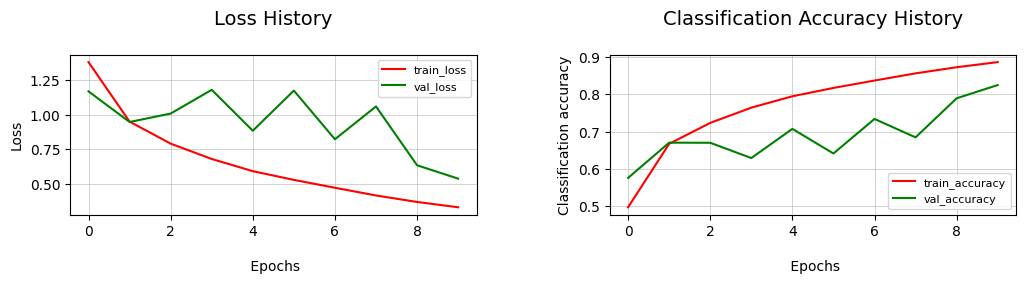

In [34]:

fig, ax = plt.subplots(1, 2, figsize=(11, 3))
fig.tight_layout(pad=4, w_pad = 6.5)

ax[0].plot(history.history['loss'], label='train_loss', color = "red")
ax[0].plot(history.history['val_loss'], label='val_loss', color = "green")

ax[0].set_title('Loss History\n', fontsize=14)
ax[0].set_xlabel('\n Epochs')
ax[0].set_ylabel('Loss')
#ax[0].set_xticks(list(range(1, num_epochs+1, 3)))
ax[0].grid(linewidth=0.4)
ax[0].legend(loc="best", prop={'size': 8})


ax[1].plot(history.history['accuracy'], label='train_accuracy', color = "red")
ax[1].plot(history.history['val_accuracy'], label = 'val_accuracy', color = "green")
ax[1].set_title('Classification Accuracy History\n', fontsize=14)
ax[1].set_xlabel('\n Epochs')
ax[1].set_ylabel('Classification accuracy')
ax[1].grid(linewidth=0.4)

#ax[1].set_xticks(list(range(1, num_epochs+1, 3)))
ax[1].legend(loc ="lower right", prop={'size': 8})

#plt.savefig("history_plot.png")
plt.show()